Данные взяты с сайта kaggle.
Ссылка на датасет "IBOVESPA Futures Contracts":
https://www.kaggle.com/datasets/brunotavares/ibovespa-emini-future-contracts?select=winz19.csv
Этот набор данных представляет набор данных о фьючерсных контрактах бразильского фондового индекса IBOVESPA («e-mini» и «full»), собранный из разных источников.


Импорт необходимых библиотек.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Загрузка данных из файла csv, загруженного на гугл-диск.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/indfut_2001_2014.csv', delimiter=',')
df.head(20)

,dateTime,Open,High,Low,Close
0,1/2/2001 7:48,15420.0,15420.0,15420.0,15420.0
1,1/2/2001 9:02,15540.0,15550.0,15540.0,15550.0
2,1/2/2001 9:05,15550.0,15550.0,15550.0,15550.0
3,1/2/2001 9:06,15550.0,15550.0,15550.0,15550.0
4,1/2/2001 9:10,15550.0,15550.0,15550.0,15550.0
5,1/2/2001 9:15,15500.0,15500.0,15500.0,15500.0
6,1/2/2001 9:24,15540.0,15540.0,15540.0,15540.0
7,1/2/2001 9:25,15550.0,15550.0,15550.0,15550.0
8,1/2/2001 9:27,15550.0,15550.0,15550.0,15550.0
9,1/2/2001 9:45,15565.0,15565.0,15565.0,15565.0


Первичный анализ и исследование датасета.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471840 entries, 0 to 1471839
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   dateTime  1471840 non-null  object 
 1   Open      1471840 non-null  float64
 2   High      1471840 non-null  float64
 3   Low       1471840 non-null  float64
 4   Close     1471840 non-null  float64
dtypes: float64(4), object(1)
memory usage: 56.1+ MB


Столбец dateTime нужно преобразовать к формату даты.

In [5]:
df['dateTime'] = pd.to_datetime(df['dateTime'])
df.dtypes

,0
dateTime,datetime64[ns]
Open,float64
High,float64
Low,float64
Close,float64


In [6]:
df.isnull().values.any()

False

Пропущенных значений нет, это прекрасно.

In [7]:
df.shape

(1471840, 5)

Датасет состоит из 5 столбцов: дата/время; стоимость на момент открытия; стоимость на момент закрытия; максимальная стоимость за интервал времени; минимальная стоимость за интервал времени. Кол-во строк: 1 471 840.

In [9]:
df.describe()

,dateTime,Open,High,Low,Close
count,1471840,1.471840e+06,1.471840e+06,1.471840e+06,1.471840e+06
mean,2008-02-28 16:51:40.038047232,4.888382e+04,4.889777e+04,4.886962e+04,4.888357e+04
min,2001-01-02 07:48:00,8.400000e+03,8.410000e+03,8.380000e+03,8.380000e+03
25%,2004-11-09 16:11:45,2.413000e+04,2.414000e+04,2.413000e+04,2.413000e+04
50%,2008-05-08 11:56:30,5.286055e+04,5.288000e+04,5.284755e+04,5.286055e+04
75%,2011-07-22 10:18:15,6.561687e+04,6.563830e+04,6.560000e+04,6.561641e+04
max,2014-06-25 17:54:00,1.146419e+05,1.147188e+05,1.145649e+05,1.147188e+05
std,NaN,2.542555e+04,2.543291e+04,2.541811e+04,2.542544e+04


Данные собраны за период с 02.01.2001 по 25.06.2014 - за 13,5 лет. Можно делать прогноз на последующие года. Будем прогнозировать прибыль на 2015 год.

Проведем статистический анализ для лучшего понимания данных.

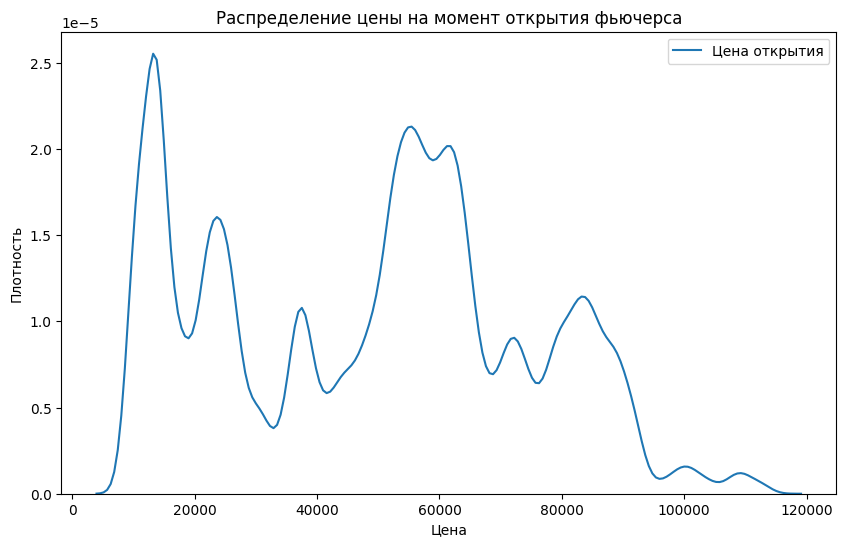

In [15]:
# Построение диаграммы распределения цены открытия и закрытия
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Open", label="Цена открытия")

plt.title("Распределение цены на момент открытия фьючерса")
plt.xlabel("Цена")
plt.ylabel("Плотность")
plt.legend()
plt.show()

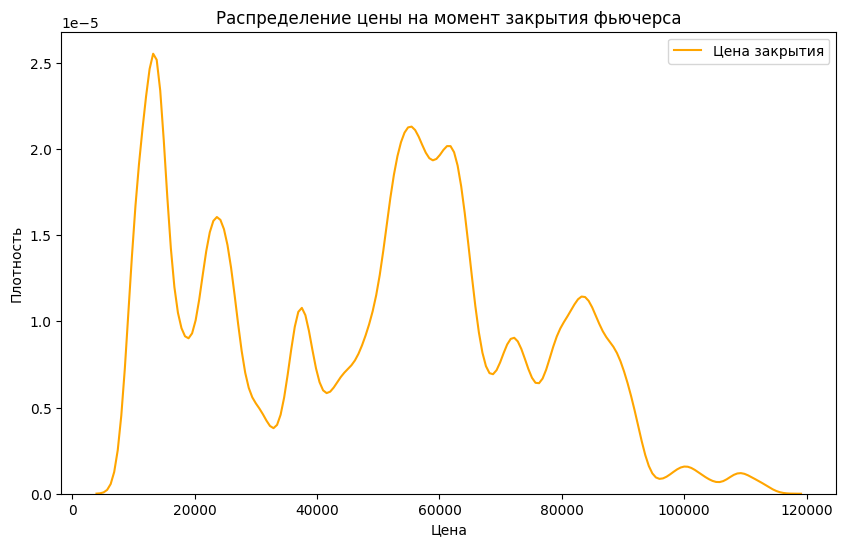

In [16]:
# Построение диаграммы распределения цены открытия и закрытия
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="Open", label="Цена закрытия", color='orange')

plt.title("Распределение цены на момент закрытия фьючерса")
plt.xlabel("Цена")
plt.ylabel("Плотность")
plt.legend()
plt.show()

Видим, что "поведение" цены открытия и закрытия фьючерса практически одинаковое.

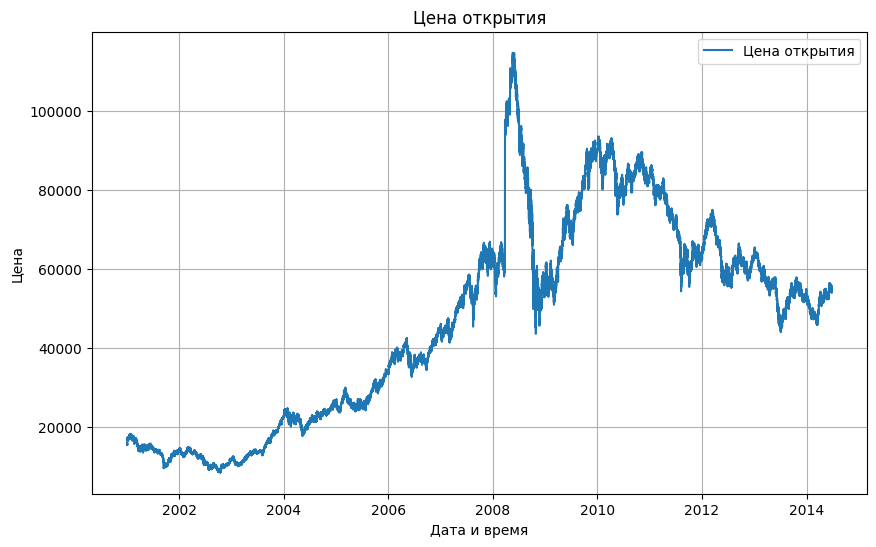

In [12]:
# Построение диаграммы цены открытия и закрытия
plt.figure(figsize=(10, 6))
plt.plot(df['dateTime'], df['Open'], label='Цена открытия')

plt.title("Цена открытия")
plt.xlabel("Дата и время")
plt.ylabel("Цена")
plt.legend()
plt.grid(True)
plt.show()

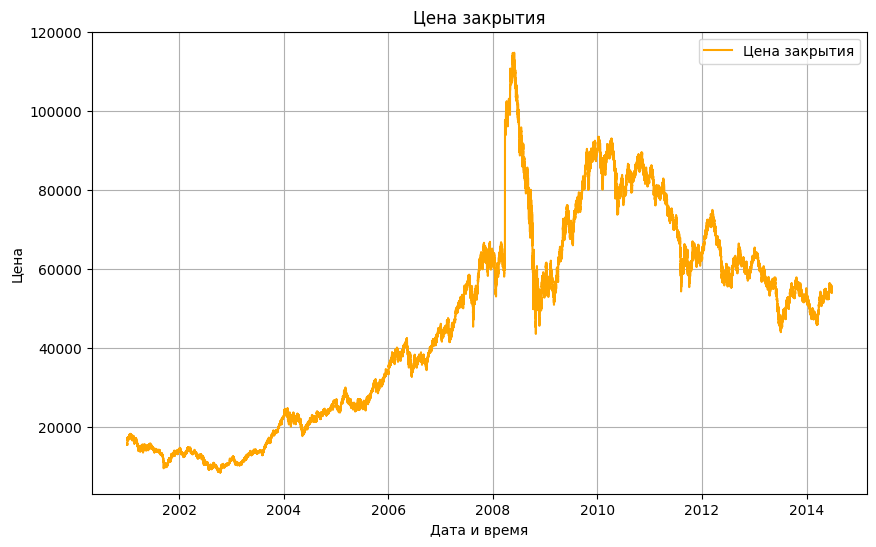

In [14]:
# Построение диаграммы цены закрытия
plt.figure(figsize=(10, 6))
plt.plot(df['dateTime'], df['Close'], label='Цена закрытия', color='orange')

plt.title("Цена закрытия")
plt.xlabel("Дата и время")
plt.ylabel("Цена")
plt.legend()
plt.grid(True)
plt.show()



Опять же, распредение цен на момент открытия и закрытия фьючерса практически одинаково. Такое схожее поведение объясняется тем, что выгрузка данных детализирована вплоть до нескольких минут, за которые эти цены меняются слабо. Если бы цена октрытия и закрытия фьючерса бралась за день, разница между ними была бы более ощутима. Также можем заметить, что с 2001 по 2008 год наблюдался стабильный рост цен открытия и закрытия; в 2008 году наблюдался их пик; затем произошло падение (вызванное определенными факторами, в этом моменте необходимо разобраться), и после подъемы цен к 2010 году наблюдается планомерное их снижение.

Теперь посчитаем суммарную прибыль (а может быть убыток) на каждый год.

In [17]:
df['Profit'] = df['Close'] - df['Open']
df.head(10)

,dateTime,Open,High,Low,Close,Profit
0,2001-01-02 07:48:00,15420.0,15420.0,15420.0,15420.0,0.0
1,2001-01-02 09:02:00,15540.0,15550.0,15540.0,15550.0,10.0
2,2001-01-02 09:05:00,15550.0,15550.0,15550.0,15550.0,0.0
3,2001-01-02 09:06:00,15550.0,15550.0,15550.0,15550.0,0.0
4,2001-01-02 09:10:00,15550.0,15550.0,15550.0,15550.0,0.0
5,2001-01-02 09:15:00,15500.0,15500.0,15500.0,15500.0,0.0
6,2001-01-02 09:24:00,15540.0,15540.0,15540.0,15540.0,0.0
7,2001-01-02 09:25:00,15550.0,15550.0,15550.0,15550.0,0.0
8,2001-01-02 09:27:00,15550.0,15550.0,15550.0,15550.0,0.0
9,2001-01-02 09:45:00,15565.0,15565.0,15565.0,15565.0,0.0


In [22]:
# Выделение года и месяца в отдельные столбцы
df['Year'] = df['dateTime'].dt.year
df['Month'] = df['dateTime'].dt.month

df.head(30)

,dateTime,Open,High,Low,Close,Profit,Year,Month
0,2001-01-02 07:48:00,15420.0,15420.0,15420.0,15420.0,0.0,2001,1
1,2001-01-02 09:02:00,15540.0,15550.0,15540.0,15550.0,10.0,2001,1
2,2001-01-02 09:05:00,15550.0,15550.0,15550.0,15550.0,0.0,2001,1
3,2001-01-02 09:06:00,15550.0,15550.0,15550.0,15550.0,0.0,2001,1
4,2001-01-02 09:10:00,15550.0,15550.0,15550.0,15550.0,0.0,2001,1
5,2001-01-02 09:15:00,15500.0,15500.0,15500.0,15500.0,0.0,2001,1
6,2001-01-02 09:24:00,15540.0,15540.0,15540.0,15540.0,0.0,2001,1
7,2001-01-02 09:25:00,15550.0,15550.0,15550.0,15550.0,0.0,2001,1
8,2001-01-02 09:27:00,15550.0,15550.0,15550.0,15550.0,0.0,2001,1
9,2001-01-02 09:45:00,15565.0,15565.0,15565.0,15565.0,0.0,2001,1


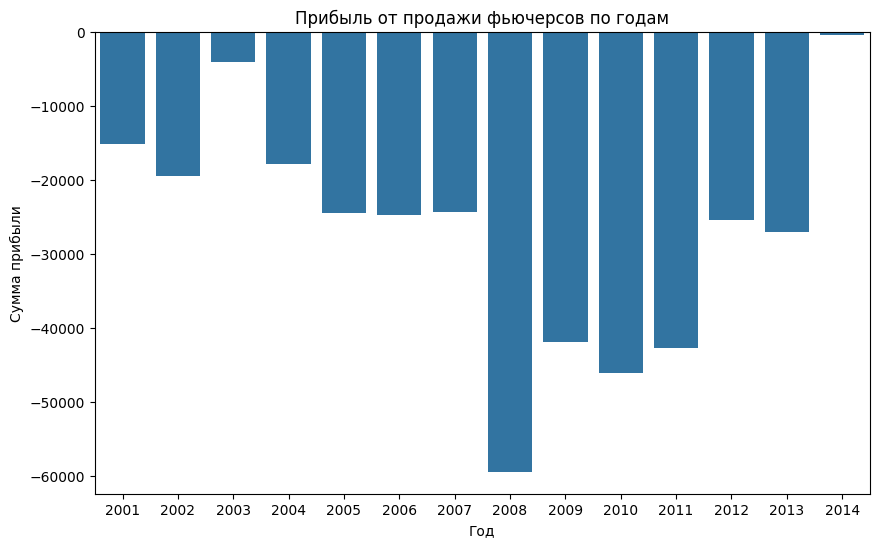

In [24]:
# Группировка по годам и подсчет суммы по столбцу "Profit"
df_grouped_year = df.groupby('Year')['Profit'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped_year, x="Year", y="Profit")

plt.title("Прибыль от продажи фьючерсов по годам")
plt.xlabel("Год")
plt.ylabel("Сумма прибыли")
plt.show()

Видим, что сделки от продаж фьючерсов в момент закрытия убыточны. Предположим, что алгоритм продаж фьючерсов работал таким образом, что продавал его в момент его наибольшей цены и посмотрим на такое же распределение.

In [25]:
df['Profit2'] = df['High'] - df['Open']
df.head(10)

,dateTime,Open,High,Low,Close,Profit,Year,Month,Profit2
0,2001-01-02 07:48:00,15420.0,15420.0,15420.0,15420.0,0.0,2001,1,0.0
1,2001-01-02 09:02:00,15540.0,15550.0,15540.0,15550.0,10.0,2001,1,10.0
2,2001-01-02 09:05:00,15550.0,15550.0,15550.0,15550.0,0.0,2001,1,0.0
3,2001-01-02 09:06:00,15550.0,15550.0,15550.0,15550.0,0.0,2001,1,0.0
4,2001-01-02 09:10:00,15550.0,15550.0,15550.0,15550.0,0.0,2001,1,0.0
5,2001-01-02 09:15:00,15500.0,15500.0,15500.0,15500.0,0.0,2001,1,0.0
6,2001-01-02 09:24:00,15540.0,15540.0,15540.0,15540.0,0.0,2001,1,0.0
7,2001-01-02 09:25:00,15550.0,15550.0,15550.0,15550.0,0.0,2001,1,0.0
8,2001-01-02 09:27:00,15550.0,15550.0,15550.0,15550.0,0.0,2001,1,0.0
9,2001-01-02 09:45:00,15565.0,15565.0,15565.0,15565.0,0.0,2001,1,0.0


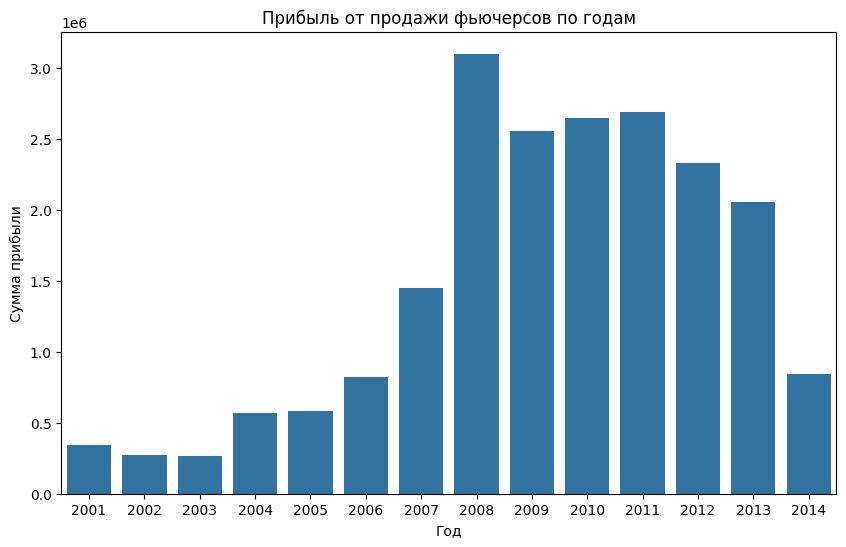

In [27]:
df_grouped_year2 = df.groupby('Year')['Profit2'].sum().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped_year2, x="Year", y="Profit2")

plt.title("Прибыль от продажи фьючерсов по годам")
plt.xlabel("Год")
plt.ylabel("Сумма прибыли")
plt.show()

In [28]:
pr2 = sum(df['Profit2'])
print(pr2)

20526657.929975405


In [32]:
avg_values = df[['Close', 'Open', 'High', 'Low']].mean()
print(avg_values)

Close    48883.566293
Open     48883.819991
High     48897.766247
Low      48869.618764
dtype: float64


Общая прибыли за 13,5 лет составила 20 526 657.93
Наибольшая прибыль: 2008 год - чуть более 3 млн.
Наименьшая прибыль: 2002 год - менее 500 тыс.

Чтобы построить модель машинного обучения, прогнозирующую прибыль от продаж фьючерсов на 2015 год, можно использовать библиотеку scikit-learn.

MSE: 5.117180784398645e-22
Прогнозированная прибыль на 2015 год: 13.946256000000036


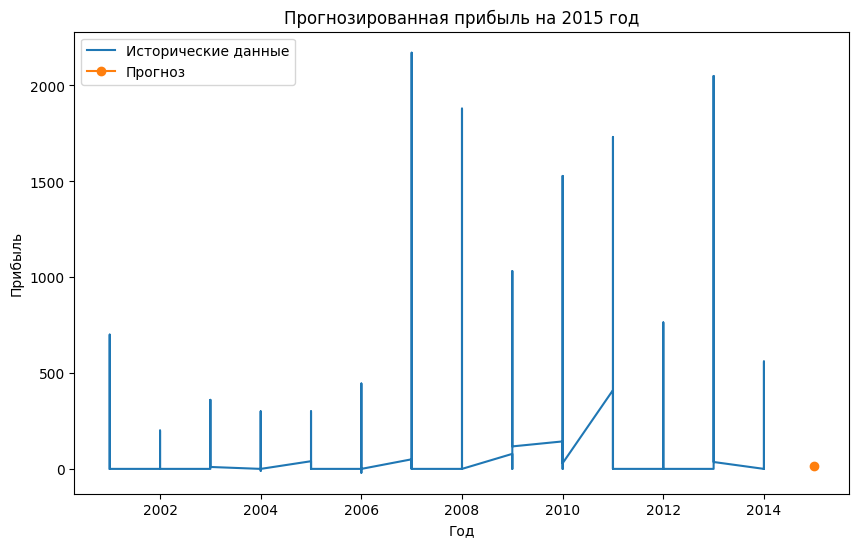

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Выборка данных для обучения и тестирования
X = df[['Open', 'Close', 'High', 'Low', 'Year']]
y = df['Profit2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка модели
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Прогнозирование прибыли на 2015 год (в качестве значений взяты средние значения в 2014 году)
df_2015 = pd.DataFrame({'Open': [48883.819991], 'Close': [48883.566293], 'High': [48897.766247], 'Low': [48869.618764], 'Year': [2015]})
y_pred_2015 = model.predict(df_2015)
print(f'Прогнозированная прибыль на 2015 год: {y_pred_2015[0]}')

# Построение диаграммы прогноза на 2015 год
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Profit2'], label='Исторические данные')
plt.plot([2015], y_pred_2015, label='Прогноз', marker='o')
plt.title('Прогнозированная прибыль на 2015 год')
plt.xlabel('Год')
plt.ylabel('Прибыль')
plt.legend()
plt.show()

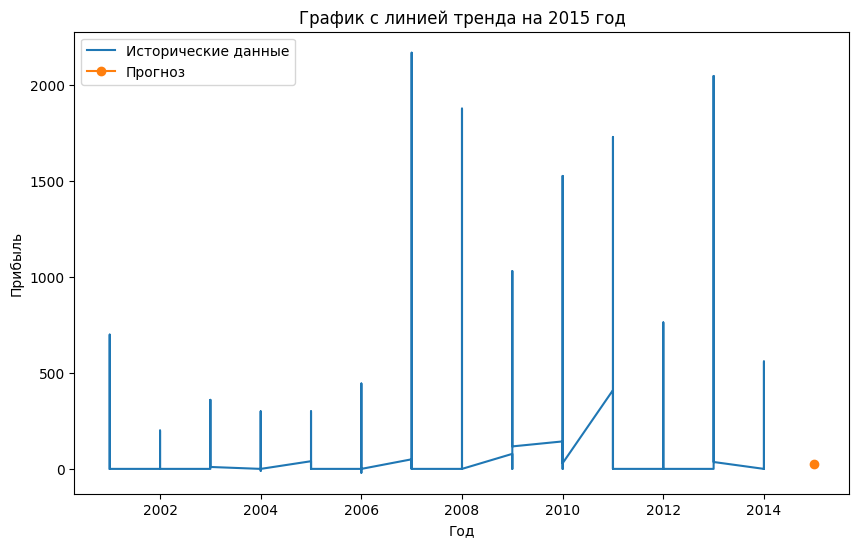

In [42]:
df_plot = df[['Year', 'Profit2']]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(df_plot['Year'], df_plot['Profit2'], label='Исторические данные')

# Построение линии тренда на 2015 год
x = np.array(df_plot['Year'])
y = np.array(df_plot['Profit2'])
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot([2015], p(2015), label='Прогноз', marker='o')

# Вывод графика
plt.title('График с линией тренда на 2015 год')
plt.xlabel('Год')
plt.ylabel('Прибыль')
plt.legend()
plt.show()

Согласно прогнозу прибыль в 2015 ученьшится по сравнению в 2014 годом. Теперь построим дашборд в Polymatica dashboard. Выгрузим подготовленные данные в формате csv.

In [43]:
df.to_csv('df_indfut.csv', index=False)